# 練習
## Is someone there?
In this exercise, you will check whether or not there is a person present in an image taken at night.

LAndscape of starry night with a young man in the left bottom corner
Image preloaded as night_image.
The Cascade of classifiers class from feature module has been already imported. The same is true for the show_detected_face() function, that is used to display the face marked in the image and crop so it can be shown separately.

![image.png](attachment:image.png)

In [ ]:
import skimage
from skimage import data
print(skimage.__file__)

trained_file = data.lbp_frontal_face_cascade_filename()
trained_file

/usr/local/lib/python3.7/dist-packages/skimage/__init__.py


'/root/.cache/scikit-image/0.18.3/data/../data/lbpcascade_frontalface_opencv.xml'

In [ ]:
!ls /usr/local/lib/python3.7/dist-packages/skimage/data/

astronaut.png	     grass.png				motorcycle_left.png
_binary_blobs.py     gravel.png				motorcycle_right.png
brick.png	     horse.png				page.png
camera.png	     hubble_deep_field.jpg		phantom.png
cell.png	     ihc.png				__pycache__
chelsea.png	     __init__.py			README.txt
chessboard_GRAY.png  lbpcascade_frontalface_opencv.xml	_registry.py
chessboard_RGB.png   lfw_subset.npy			retina.jpg
clock_motion.png     logo.png				rocket.jpg
coffee.png	     microaneurysms.png			setup.py
coins.png	     moon.png				tests
color.png	     motorcycle_disp.npz		text.png


In [3]:
!cp /usr/local/lib/python3.7/dist-packages/skimage/data/lbpcascade_frontalface_opencv.xml .

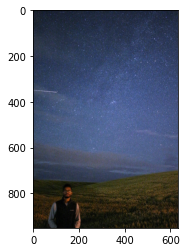

(951, 634, 3)

In [23]:
# 準備事項

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np, ast
from skimage import data
from skimage.feature import Cascade
from matplotlib import patches

def crop_face(result, detected, title="Face detected"):
    for d in detected:
        print(d)
        rostro= result[d['r']:d['r']+d['height'], d['c']:d['c']+d['width']]
    
        plt.figure(figsize=(3, 3))
        plt.imshow(rostro)    
        plt.title(title)
        plt.axis('off')
        plt.show()

def show_image(image, title='Image', cmap_type='gray', interpolation=None):
    plt.imshow(image, cmap=cmap_type)    
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def plot_comparision(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(32,8), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (   patch['c'], patch['r']),
                    patch['width'],
                    patch['height'],
                    fill=False,
                    color='r',
                    linewidth=2)
        )
        #crop_face(result, detected)
    plt.show()    
########################2022.09.18
def show_detected_face_crop(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (   patch['c'], patch['r']),
                    patch['width'],
                    patch['height'],
                    fill=False,
                    color='r',
                    linewidth=2)
        )
    crop_face(result, detected) #<-----------------注意內縮的狀況
    plt.show()  
########################
import ast

with open('night_image.txt') as f:
    night_image = np.array(ast.literal_eval(f.read()), dtype='uint8')
    
plt.imshow(night_image)    
plt.show()
night_image.shape
# Load the trained file from the data module.
# Initialize the detector cascade with the trained file.
# Detect the faces in the image, setting the minimum size of the searching window to 10 pixels and 200 pixels for the maximum.


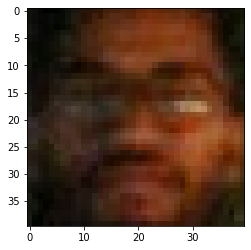

In [6]:
plt.imshow(night_image[774:774+40, 131:131+40])
plt.show()

{'r': 771, 'c': 128, 'width': 46, 'height': 46}


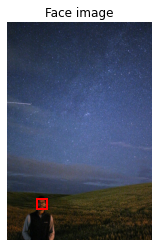

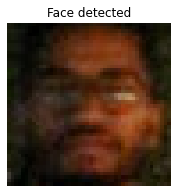

In [19]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(30, 30), #<----------------最小SIZE
                                       max_size=(200, 200))

# Show the detected faces
show_detected_face_crop(night_image, detected)

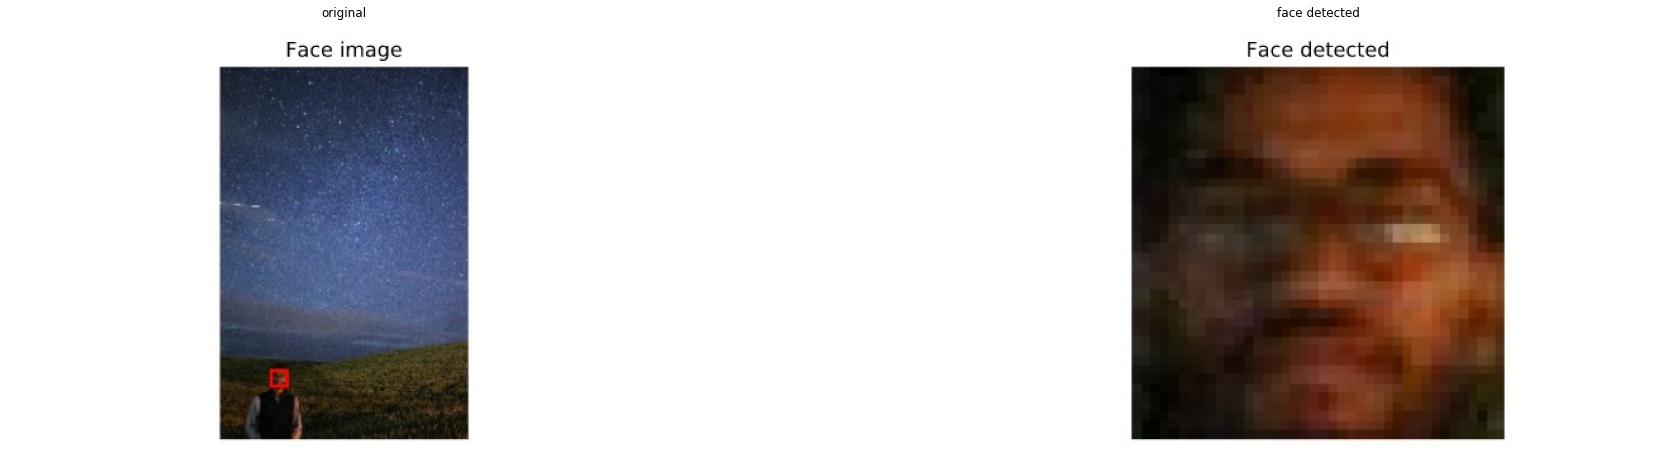

In [ ]:
# 預期結果
original, face = plt.imread('Face image - detected.jpg'), \
                     plt.imread('Face image - detected man.jpg')

plot_comparision(original, face, 'face detected')

# 練習
Multiple faces
In this exercise, you will detect multiple faces in an image and show them individually. Think of this as a way to create a dataset of your own friends' faces!

A group of 7 friends
Image preloaded as friends_image.
The Cascade of classifiers class from feature module has already been imported, as well as the show_detected_face() function which is used to display the face marked in the image and crop it so it can be shown separately.

![image.png](attachment:image.png)

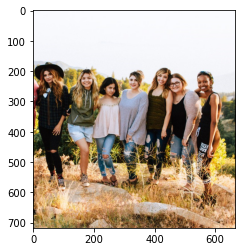

(717, 667, 3)

In [20]:
# 準備事項
with open('friends_image.txt') as f:
    friends_image = np.array(ast.literal_eval(f.read()), dtype='uint8')
plt.imshow(friends_image)    
plt.show()
friends_image.shape    

{'r': 202, 'c': 31, 'width': 36, 'height': 36}


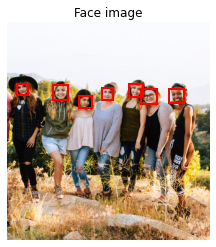

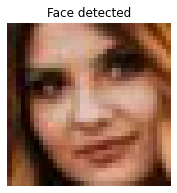

{'r': 202, 'c': 402, 'width': 45, 'height': 45}


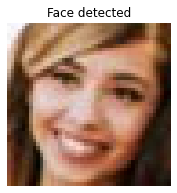

{'r': 207, 'c': 152, 'width': 47, 'height': 47}


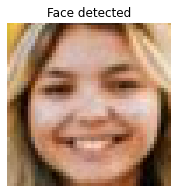

{'r': 217, 'c': 311, 'width': 39, 'height': 39}


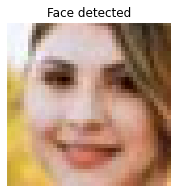

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


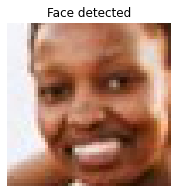

{'r': 218, 'c': 440, 'width': 52, 'height': 52}


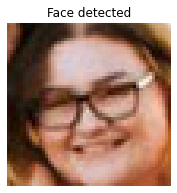

{'r': 242, 'c': 237, 'width': 41, 'height': 41}


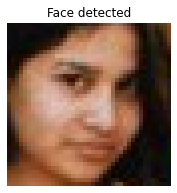

In [24]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
show_detected_face_crop(friends_image, detected)

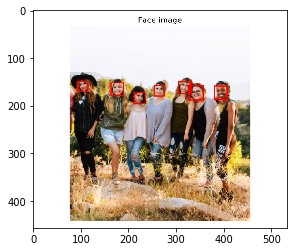

In [ ]:
# 預期結果
plt.imshow(plt.imread('friends-0.jpg'))
plt.show()


# <script.py> output:
#     {'r': 202, 'c': 31, 'width': 36, 'height': 36}
#     {'r': 202, 'c': 402, 'width': 45, 'height': 45}
#     {'r': 207, 'c': 152, 'width': 47, 'height': 47}
#     {'r': 217, 'c': 311, 'width': 39, 'height': 39}
#     {'r': 219, 'c': 533, 'width': 48, 'height': 48}
#     {'r': 218, 'c': 440, 'width': 52, 'height': 52}
#     {'r': 242, 'c': 237, 'width': 41, 'height': 41}

# 練習
Segmentation and face detection
Previously, you learned how to make processes more computationally efficient with unsupervised superpixel segmentation. In this exercise, you'll do just that!

Using the slic() function for segmentation, pre-process the image before passing it to the face detector.

Young woman selfie
Image preloaded as profile_image.
The Cascade class, the slic() function from segmentation module, and the show_detected_face() function for visualization have already been imported. The detector is already initialized and ready to use as detector.

![image.png](attachment:image.png)

In [25]:
# 準備事項
import ast
with open('profile_image.txt') as f:
    profile_image = np.array(ast.literal_eval(f.read()), dtype='uint8')
print(profile_image.shape)
# plt.imshow(profile_image)
# plt.show()

(882, 662, 3)


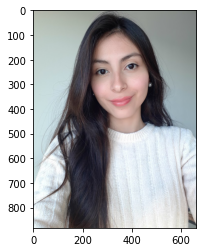

In [26]:
plt.imshow(profile_image)
plt.show()

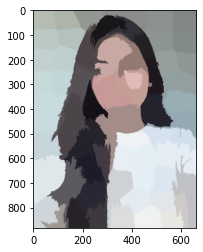

In [27]:
# Obtain the segmentation with default 100 regions
from skimage.segmentation import slic
from skimage.color import label2rgb

segments = slic(profile_image, n_segments= 90, start_label=1)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg', bg_label = None)

plt.imshow(segmented_image.astype('uint8'))
plt.show()

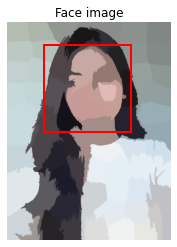

In [28]:
# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image.astype('uint8'), detected)

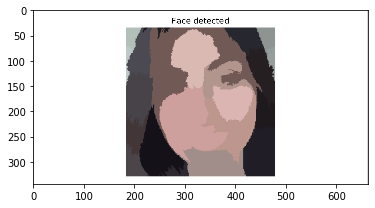

In [ ]:
# 預計結果
plt.imshow(plt.imread('profile_image face detected.jpg'))
plt.show()